### Import Requirements

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from scipy import stats
import sklearn
from sklearn import metrics
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
pd.set_option('display.max_columns',None)

In [187]:
dt=pd.read_csv('laptop_details.csv')
dt.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [188]:
print(dt['Feature'][0])
print(dt['Feature'][2])
print(dt['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


In [189]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

dt['Processor'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [190]:
dt.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [191]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

dt['RAM'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [192]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]


In [193]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

dt['OS'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [194]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[]


In [195]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

dt['Storage'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [196]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD]


In [197]:
# Brand

regex = r'^\w+'

dt['Brand'] = dt['Product'].apply(lambda x : re.findall(regex, x))

In [198]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


### Exploratory Data Analysis

In [199]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [200]:
# Missing Values

dt.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [201]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


In [202]:
print(dt['Processor'][0])

['Intel Core i3 Processor']


In [203]:
print(''.join(dt['Processor'][0]))

Intel Core i3 Processor


In [204]:
dt.Processor = dt.Processor.apply(lambda x : ''.join(x))
dt.RAM = dt.RAM.apply(lambda x : ''.join(x))
dt.OS = dt.OS.apply(lambda x : ''.join(x))
dt.Storage = dt.Storage.apply(lambda x : ''.join(x))
dt.Brand = dt.Brand.apply(lambda x : ''.join(x))

In [205]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [206]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [207]:
# Manipulating MRP values

dt.MRP = dt.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [208]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [209]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.8+ KB


In [210]:
dt['OS'].unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System', '',
       '32 bit Windows 11 Operating System',
       '64 bit DOS Operating System', '64 bit Chrome Operating System'],
      dtype=object)

In [211]:
a = []
for i in dt['OS']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['OS']=a

In [212]:
dt['OS'].value_counts(normalize=True)*100

64 bit Windows 11 Operating System    76.952381
64 bit Windows 10 Operating System    22.285714
64 bit DOS Operating System            0.380952
32 bit Windows 11 Operating System     0.190476
64 bit Chrome Operating System         0.190476
Name: OS, dtype: float64

In [213]:
dt["Processor"].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', '', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor',
       'AMD Ryzen 3 Quad Core Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Intel Core i9 Processor', 'Intel Pentium Silver Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [214]:
a = []
for i in dt['Processor']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['Processor']=a

In [215]:
dt['Processor'].value_counts(normalize=True)*100

Intel Core i5 Processor              22.421525
Intel Core i3 Processor              19.282511
AMD Ryzen 9 Octa Core Processor      13.004484
AMD Ryzen 7 Octa Core Processor      11.808670
Intel Core i7 Processor               7.324365
AMD Ryzen 5 Hexa Core Processor       7.174888
AMD Ryzen 3 Dual Core Processor       6.278027
AMD Ryzen 5 Quad Core Processor       5.530643
Intel Celeron Dual Core Processor     2.989537
Intel Core i9 Processor               1.494768
AMD Ryzen 3 Quad Core Processor       0.597907
Intel Pentium Quad Core Processor     0.448430
Intel Celeron Quad Core Processor     0.448430
Intel Pentium Silver Processor        0.298954
AMD Athlon Dual Core Processor        0.298954
AMD Ryzen 5 Dual Core Processor       0.149477
AMD Ryzen 7 Quad Core Processor       0.149477
AMD Dual Core Processor               0.149477
AMD Ryzen 3 Hexa Core Processor       0.149477
Name: Processor, dtype: float64

In [216]:
dt['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [217]:
dt['RAM'].value_counts(normalize=True)*100

8 GB DDR4 RAM                                                                                             52.361111
16 GB DDR4 RAM                                                                                            21.250000
16 GB DDR5 RAM                                                                                            10.694444
4 GB DDR4 RAM                                                                                              3.611111
8 GB LPDDR4X RAM                                                                                           2.222222
16 GB LPDDR4X RAM                                                                                          2.222222
32 GB DDR5 RAM                                                                                             1.527778
16 GB LPDDR5 RAM                                                                                           1.250000
4 GB LPDDR4 RAM                                                         

In [218]:
dt['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

In [219]:
a = []
for i in dt['Storage']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['Storage']=a

In [220]:
dt['Storage'].value_counts(normalize=True)*100

512 GB SSD                      52.816901
1 TB SSD                        24.788732
256 GB SSD                      13.802817
1 TB HDD256 GB SSD               3.661972
1 TB HDD                         2.394366
2 TB SSD                         0.985915
128 GB SSD                       0.845070
1 TB HDD512 GB SSD               0.281690
128 GB SSD1 TB HDD128 GB SSD     0.281690
256 GB HDD256 GB SSD             0.140845
Name: Storage, dtype: float64

In [221]:
dt['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [222]:
dt['Brand'].value_counts(normalize=True)*100

ASUS         34.861111
Lenovo       27.222222
HP            8.472222
DELL          8.472222
acer          4.861111
RedmiBook     4.305556
MSI           4.166667
Infinix       2.777778
APPLE         2.638889
realme        0.833333
ALIENWARE     0.416667
SAMSUNG       0.277778
Ultimus       0.277778
Vaio          0.138889
GIGABYTE      0.138889
Nokia         0.138889
Name: Brand, dtype: float64

### Handling Missing Values

In [223]:
# Null values

dt.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor     51
RAM            0
OS           195
Storage       10
Brand          0
dtype: int64

In [224]:
dt.drop('Rating',axis=1,inplace=True)

In [225]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,NaN,512 GB SSD,ASUS


In [226]:
dt.shape

(720, 8)

In [227]:
dt['OS'].value_counts(normalize=True)*100

64 bit Windows 11 Operating System    76.952381
64 bit Windows 10 Operating System    22.285714
64 bit DOS Operating System            0.380952
32 bit Windows 11 Operating System     0.190476
64 bit Chrome Operating System         0.190476
Name: OS, dtype: float64

In [228]:
dt['Processor'].value_counts(normalize=True)*100

Intel Core i5 Processor              22.421525
Intel Core i3 Processor              19.282511
AMD Ryzen 9 Octa Core Processor      13.004484
AMD Ryzen 7 Octa Core Processor      11.808670
Intel Core i7 Processor               7.324365
AMD Ryzen 5 Hexa Core Processor       7.174888
AMD Ryzen 3 Dual Core Processor       6.278027
AMD Ryzen 5 Quad Core Processor       5.530643
Intel Celeron Dual Core Processor     2.989537
Intel Core i9 Processor               1.494768
AMD Ryzen 3 Quad Core Processor       0.597907
Intel Pentium Quad Core Processor     0.448430
Intel Celeron Quad Core Processor     0.448430
Intel Pentium Silver Processor        0.298954
AMD Athlon Dual Core Processor        0.298954
AMD Ryzen 5 Dual Core Processor       0.149477
AMD Ryzen 7 Quad Core Processor       0.149477
AMD Dual Core Processor               0.149477
AMD Ryzen 3 Hexa Core Processor       0.149477
Name: Processor, dtype: float64

In [229]:
dt['RAM'].value_counts(normalize=True)*100

8 GB DDR4 RAM                                                                                             52.361111
16 GB DDR4 RAM                                                                                            21.250000
16 GB DDR5 RAM                                                                                            10.694444
4 GB DDR4 RAM                                                                                              3.611111
8 GB LPDDR4X RAM                                                                                           2.222222
16 GB LPDDR4X RAM                                                                                          2.222222
32 GB DDR5 RAM                                                                                             1.527778
16 GB LPDDR5 RAM                                                                                           1.250000
4 GB LPDDR4 RAM                                                         

In [230]:
dt['Storage'].value_counts(normalize=True)*100

512 GB SSD                      52.816901
1 TB SSD                        24.788732
256 GB SSD                      13.802817
1 TB HDD256 GB SSD               3.661972
1 TB HDD                         2.394366
2 TB SSD                         0.985915
128 GB SSD                       0.845070
1 TB HDD512 GB SSD               0.281690
128 GB SSD1 TB HDD128 GB SSD     0.281690
256 GB HDD256 GB SSD             0.140845
Name: Storage, dtype: float64

In [231]:
dt['MRP'].value_counts(normalize=True)*100

39990.0     8.472222
36990.0     5.416667
85990.0     4.722222
38705.0     4.166667
196990.0    4.166667
              ...   
301990.0    0.138889
37000.0     0.138889
42690.0     0.138889
140990.0    0.138889
23490.0     0.138889
Name: MRP, Length: 251, dtype: float64

### Treating Missing Values

In [233]:
print(dt['OS'].value_counts().index[0])
print(dt['Storage'].value_counts().index[0])
print(dt['Processor'].value_counts().index[0])

64 bit Windows 11 Operating System
512 GB SSD
Intel Core i5 Processor


In [234]:
def impute_nan(data,variable):
    most_frequent_category=dt[variable].value_counts().index[0]
    dt[variable].fillna(most_frequent_category,inplace=True)
    
for feature in ['Processor','OS','Storage']:
    impute_nan(dt,feature)

In [235]:
dt.isnull().sum()

Product      0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

### Data Visualization

In [236]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS


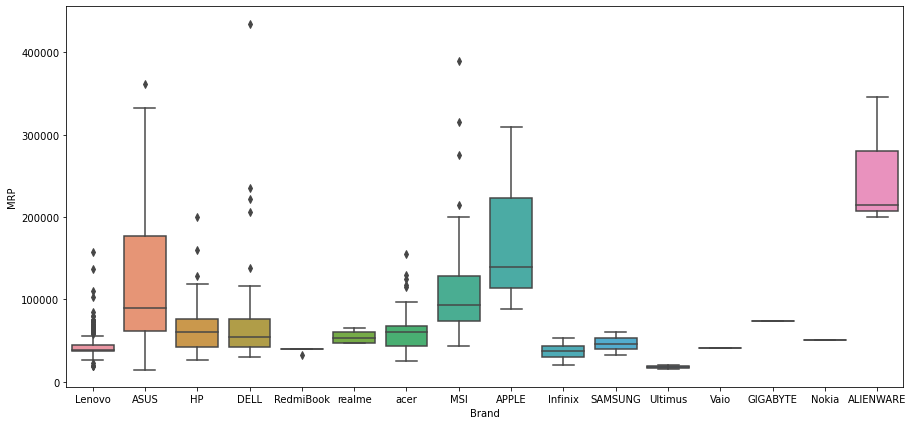

In [237]:
# Outliers Detection using Box plot

plt.figure(figsize=(15, 7))
sns.boxplot(x = dt.Brand, y = dt.MRP)
plt.show()

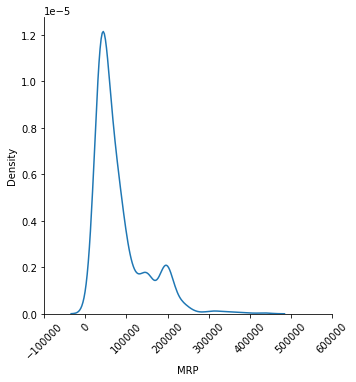

In [238]:
# Skewness

g = sns.displot(dt.MRP, kind='kde')
g.set_xticklabels(rotation=45)
plt.show()

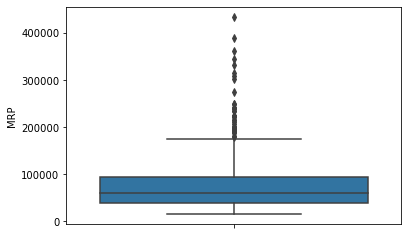

In [239]:
sns.boxplot(y = dt.MRP)
plt.show()

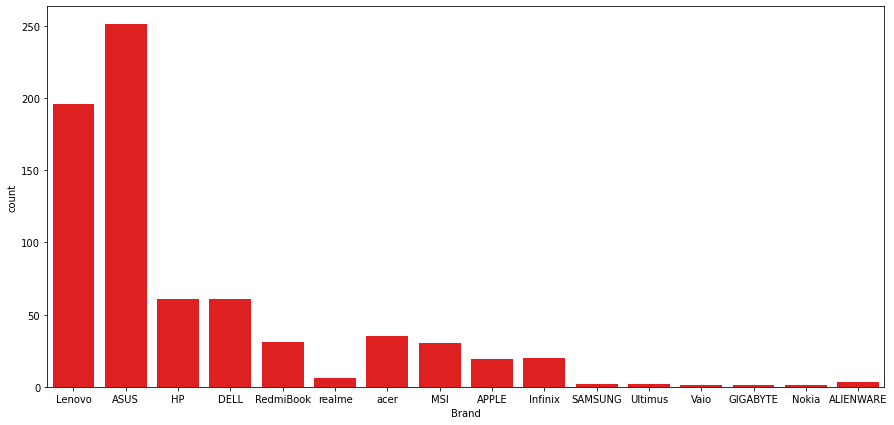

In [240]:
plt.figure(figsize=(15, 7))
sns.countplot(x=dt.Brand,color='r')
plt.show()

**Observation** - The above plot show us the count for each product. We can see that ASUS is havng highest number of product listing on Flipkart website

In [241]:
dt.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ALIENWARE  199990.0  345390.0  253390.000000
APPLE       88990.0  309490.0  162332.105263
ASUS        14990.0  361990.0  115667.589641
DELL        30428.0  434830.0   73660.688525
GIGABYTE    73990.0   73990.0   73990.000000
HP          25990.0  199990.0   65195.557377
Infinix     20990.0   52990.0   36890.000000
Lenovo      19490.0  157990.0   45454.709184
MSI         43990.0  389990.0  121963.966667
Nokia       50490.0   50490.0   50490.000000
RedmiBook   31990.0   39990.0   39731.935484
SAMSUNG     32990.0   59990.0   46490.000000
Ultimus     15990.0   19990.0   17990.000000
Vaio        40990.0   40990.0   40990.000000
acer        24990.0  155490.0   64314.742857
realme      46990.0   64999.0   54324.833333

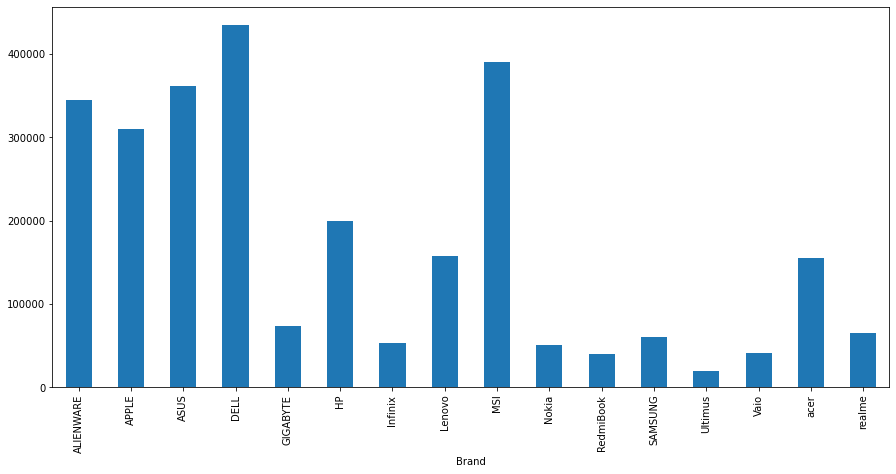

In [242]:
plt.figure(figsize=(15, 7))
dt.groupby(['Brand'])['MRP'].max().plot(kind='bar')
plt.show()

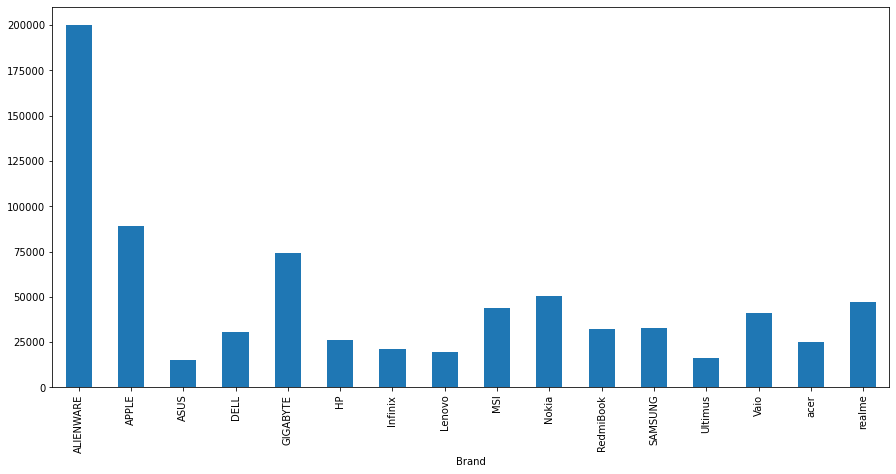

In [243]:
plt.figure(figsize=(15, 7))
dt.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')
plt.show()

In [244]:
pd.cut(dt['MRP'],[20000,50000,150000,450000]).value_counts(normalize=True)*100

(20000, 50000]      44.179523
(50000, 150000]     38.990182
(150000, 450000]    16.830295
Name: MRP, dtype: float64

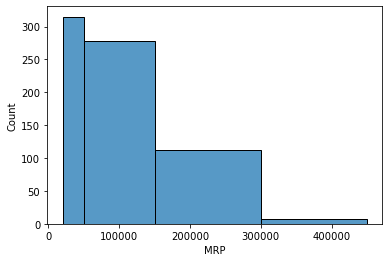

In [245]:
sns.histplot(dt.MRP,bins=[20000,50000,150000,300000,450000])
plt.show()

### Feature Selection`

In [246]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS


In [247]:
dt.columns

Index(['Product', 'MRP', 'Feature', 'Processor', 'RAM', 'OS', 'Storage',
       'Brand'],
      dtype='object')

In [248]:
new_f=['Processor', 'RAM', 'OS', 'Storage', 'MRP']

df=pd.DataFrame(dt,columns=new_f)

In [249]:
df.head()

,Processor,RAM,OS,Storage,MRP
0,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,36990.0
1,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39990.0
2,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,32990.0
3,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,49990.0
4,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,49990.0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Processor  720 non-null    object 
 1   RAM        720 non-null    object 
 2   OS         720 non-null    object 
 3   Storage    720 non-null    object 
 4   MRP        720 non-null    float64
dtypes: float64(1), object(4)
memory usage: 28.2+ KB


In [251]:
df.shape

(720, 5)

In [252]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MRP,720.0,81605.8375,61552.955102,14990.0,38996.75,59990.0,95240.0,434830.0


In [253]:
df.describe(include=["object"]).T

,count,unique,top,freq
Processor,720,19,Intel Core i5 Processor,201
RAM,720,19,8 GB DDR4 RAM,377
OS,720,5,64 bit Windows 11 Operating System,599
Storage,720,10,512 GB SSD,385


In [254]:
# Numerical Columns

num_data=[i for i in list(df.columns) if df[i].dtype!='O']
num_data

['MRP']

In [255]:
# Catagorical Columns

cat_data=[j for j in list(df.columns) if df[j].dtype=='O']
cat_data

['Processor', 'RAM', 'OS', 'Storage']

## Correlation Test

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

**Interpretation**

H0: the two samples are independent.

H1: there is a dependency between the samples.

#### Numerical vs Catagorical Column

In [256]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=num_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('MRP',), value='MRP'), Dropdown(description='col2'…

<function __main__.chi_test(col1, col2)>

#### Categorical vs Categorical Column

In [257]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=cat_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('Processor', 'RAM', 'OS', 'Storage'), value='Proce…

<function __main__.chi_test(col1, col2)>

In [258]:
np.round((pd.crosstab(df.OS,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,128 GB SSD1 TB HDD128 GB SSD,2 TB SSD,256 GB HDD256 GB SSD,256 GB SSD,512 GB SSD,All
OS,,,,,,,,,,,
32 bit Windows 11 Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14
64 bit Chrome Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14
64 bit DOS Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14,0.28
64 bit Windows 10 Operating System,1.94,1.53,0.14,2.50,0.00,0.28,0.14,0.00,2.50,7.22,16.25
64 bit Windows 11 Operating System,0.42,2.08,0.14,21.94,0.83,0.00,0.83,0.14,10.97,45.83,83.19
All,2.36,3.61,0.28,24.44,0.83,0.28,0.97,0.14,13.61,53.47,100.00


In [259]:
np.round((pd.crosstab(df.OS,dt.RAM,margins=True)/len(df))*100,2)

RAM,128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM,16 GB DDR4 RAM,16 GB DDR5 RAM,16 GB LPDDR3 RAM,16 GB LPDDR4 RAM,16 GB LPDDR4X RAM,16 GB LPDDR5 RAM,16 GB Unified Memory RAM,32 GB DDR4 RAM,32 GB DDR5 RAM,32 GB LPDDR4X RAM,32 GB Unified Memory RAM,4 GB DDR4 RAM,4 GB LPDDR4 RAM,4 GB LPDDR4X RAM,8 GB DDR4 RAM,8 GB DDR5 RAM,8 GB LPDDR4X RAM,8 GB Unified Memory RAM,All
OS,,,,,,,,,,,,,,,,,,,,
32 bit Windows 11 Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.14
64 bit Chrome Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.14
64 bit DOS Operating System,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.14,0.00,0.00,0.00,0.28
64 bit Windows 10 Operating System,0.14,4.17,0.00,0.14,0.00,0.56,0.00,0.00,0.42,0.00,0.14,0.00,1.67,0.00,0.00,9.03,0.00,0.00,0.00,16.25
64 bit Windows 11 Operating System,0.00,17.08,10.69,0.00,0.14,1.67,1.25,0.83,0.14,1.53,0.00,0.14,1.81,0.97,0.42,43.06,0.56,2.22,0.69,83.19
All,0.14,21.25,10.69,0.14,0.14,2.22,1.25,0.83,0.56,1.53,0.14,0.14,3.61,0.97,0.56,52.36,0.56,2.22,0.69,100.00


In [260]:
np.round((pd.crosstab(df.Processor,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,128 GB SSD1 TB HDD128 GB SSD,2 TB SSD,256 GB HDD256 GB SSD,256 GB SSD,512 GB SSD,All
Processor,,,,,,,,,,,
AMD Athlon Dual Core Processor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14,0.28
AMD Dual Core Processor,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14
AMD Ryzen 3 Dual Core Processor,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.25,4.31,5.83
AMD Ryzen 3 Hexa Core Processor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14
AMD Ryzen 3 Quad Core Processor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.56
AMD Ryzen 5 Dual Core Processor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14
AMD Ryzen 5 Hexa Core Processor,0.00,0.42,0.00,0.14,0.00,0.00,0.00,0.00,0.00,6.11,6.67
AMD Ryzen 5 Quad Core Processor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.14,5.14
AMD Ryzen 7 Octa Core Processor,0.00,0.28,0.00,6.53,0.00,0.00,0.28,0.00,0.00,3.89,10.97


In [261]:
np.round((pd.crosstab(df.RAM,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,128 GB SSD1 TB HDD128 GB SSD,2 TB SSD,256 GB HDD256 GB SSD,256 GB SSD,512 GB SSD,All
RAM,,,,,,,,,,,
128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.14
16 GB DDR4 RAM,0.00,0.56,0.28,10.83,0.00,0.00,0.00,0.00,0.00,9.58,21.25
16 GB DDR5 RAM,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.69,10.69
16 GB LPDDR3 RAM,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.14
16 GB LPDDR4 RAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14
16 GB LPDDR4X RAM,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,2.08,2.22
16 GB LPDDR5 RAM,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.69,1.25
16 GB Unified Memory RAM,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.42,0.83
32 GB DDR4 RAM,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56


### Q-Q Plot for Normality Test

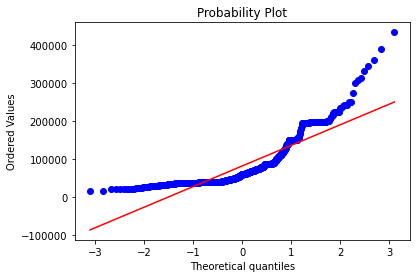

In [262]:
# Normality Test for MRP value

stats.probplot(df['MRP'], dist="norm", plot=plt)
plt.show()

### Shapiro Wilk Test for Normality

**Assumptions**

Observations in each sample are independent and identically distributed

**Interpretation**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [263]:
def shapiro_wilk(data):
    stat, p = stats.shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
        
shapiro_wilk(df['MRP'])

stat=0.779, p=0.000
Probably not Gaussian


### Outliers Detection

In [264]:
def outliers(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=data[(data[col]<lb) | (data[col]>ub)][col].shape[0]
    return outliers

print('Outliers in Price : ',outliers(df,'MRP'))

Outliers in Price :  84


In [265]:
# Identifying the inputs (X) and output (y)

y = df['MRP']  # Target Variable

X = df[['Processor', 'RAM', 'OS', 'Storage']]

### Train - Test Split

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [267]:
X_train.head()

,Processor,RAM,OS,Storage
481,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
205,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
248,Intel Core i7 Processor,16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD
211,AMD Ryzen 9 Octa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB SSD
693,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD


In [268]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(540, 4) (540,)
(180, 4) (180,)


### Data Transformation using One Hot Encoding

In [278]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')

X_train_ohe = pd.DataFrame(encoder_.fit_transform(X_train), 
                               columns=encoder_.get_feature_names_out(X_train.columns), 
                               index = X_train.index)

X_train_ohe.head()

,Processor_AMD Dual Core Processor,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,Processor_AMD Ryzen 7 Octa Core Processor,Processor_AMD Ryzen 7 Quad Core Processor,Processor_AMD Ryzen 9 Octa Core Processor,Processor_Intel Celeron Dual Core Processor,Processor_Intel Celeron Quad Core Processor,Processor_Intel Core i3 Processor,Processor_Intel Core i5 Processor,Processor_Intel Core i7 Processor,Processor_Intel Core i9 Processor,Processor_Intel Pentium Quad Core Processor,Processor_Intel Pentium Silver Processor,RAM_16 GB DDR4 RAM,RAM_16 GB DDR5 RAM,RAM_16 GB LPDDR3 RAM,RAM_16 GB LPDDR4 RAM,RAM_16 GB LPDDR4X RAM,RAM_16 GB LPDDR5 RAM,RAM_16 GB Unified Memory RAM,RAM_32 GB DDR4 RAM,RAM_32 GB DDR5 RAM,RAM_32 GB LPDDR4X RAM,RAM_32 GB Unified Memory RAM,RAM_4 GB DDR4 RAM,RAM_4 GB LPDDR4 RAM,RAM_4 GB LPDDR4X RAM,RAM_8 GB DDR4 RAM,RAM_8 GB DDR5 RAM,RAM_8 GB LPDDR4X RAM,RAM_8 GB Unified Memory RAM,OS_64 bit DOS Operating System,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System,Storage_1 TB HDD256 GB SSD,Storage_1 TB HDD512 GB SSD,Storage_1 TB SSD,Storage_128 GB SSD,Storage_128 GB SSD1 TB HDD128 GB SSD,Storage_2 TB SSD,Storage_256 GB SSD,Storage_512 GB SSD
481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
693,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Data Pre-Processing on Test Data

In [279]:
X_test_ohe = pd.DataFrame(encoder_.transform(X_test), 
                               columns=encoder_.get_feature_names_out(X_test.columns), 
                               index = X_test.index)

X_test_ohe.head()

S:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Processor_AMD Dual Core Processor,Processor_AMD Ryzen 3 Dual Core Processor,Processor_AMD Ryzen 3 Hexa Core Processor,Processor_AMD Ryzen 3 Quad Core Processor,Processor_AMD Ryzen 5 Dual Core Processor,Processor_AMD Ryzen 5 Hexa Core Processor,Processor_AMD Ryzen 5 Quad Core Processor,Processor_AMD Ryzen 7 Octa Core Processor,Processor_AMD Ryzen 7 Quad Core Processor,Processor_AMD Ryzen 9 Octa Core Processor,Processor_Intel Celeron Dual Core Processor,Processor_Intel Celeron Quad Core Processor,Processor_Intel Core i3 Processor,Processor_Intel Core i5 Processor,Processor_Intel Core i7 Processor,Processor_Intel Core i9 Processor,Processor_Intel Pentium Quad Core Processor,Processor_Intel Pentium Silver Processor,RAM_16 GB DDR4 RAM,RAM_16 GB DDR5 RAM,RAM_16 GB LPDDR3 RAM,RAM_16 GB LPDDR4 RAM,RAM_16 GB LPDDR4X RAM,RAM_16 GB LPDDR5 RAM,RAM_16 GB Unified Memory RAM,RAM_32 GB DDR4 RAM,RAM_32 GB DDR5 RAM,RAM_32 GB LPDDR4X RAM,RAM_32 GB Unified Memory RAM,RAM_4 GB DDR4 RAM,RAM_4 GB LPDDR4 RAM,RAM_4 GB LPDDR4X RAM,RAM_8 GB DDR4 RAM,RAM_8 GB DDR5 RAM,RAM_8 GB LPDDR4X RAM,RAM_8 GB Unified Memory RAM,OS_64 bit DOS Operating System,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System,Storage_1 TB HDD256 GB SSD,Storage_1 TB HDD512 GB SSD,Storage_1 TB SSD,Storage_128 GB SSD,Storage_128 GB SSD1 TB HDD128 GB SSD,Storage_2 TB SSD,Storage_256 GB SSD,Storage_512 GB SSD
198,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
487,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

### Linear Regression

In [280]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_ohe, y_train)

LinearRegression()

In [281]:
y_test_pred = regressor.predict(X_test_ohe)

In [282]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
198,39990.0,48132.849611
487,38705.0,38587.578295
365,118990.0,95846.761931
620,73490.0,59836.356627
636,38705.0,38587.578295


<AxesSubplot:xlabel='MRP', ylabel='Count'>

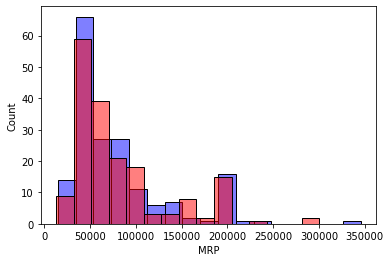

In [283]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [284]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  16048.616125389495


### KNN Regression

In [285]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_ohe, y_train)

KNeighborsRegressor()

In [286]:
y_test_pred = regressor.predict(X_test_ohe)

In [287]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
198,39990.0,47450.0
487,38705.0,38705.0
365,118990.0,90442.0
620,73490.0,73590.0
636,38705.0,38705.0


<AxesSubplot:xlabel='MRP', ylabel='Count'>

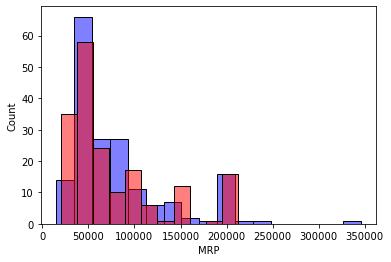

In [288]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [289]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  22155.48149566302


### Decision Tree Regression

In [290]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_ohe, y_train)

DecisionTreeRegressor()

In [291]:
y_test_pred = regressor.predict(X_test_ohe)

In [292]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
198,39990.0,46782.500000
487,38705.0,38705.000000
365,118990.0,87050.000000
620,73490.0,74740.818182
636,38705.0,38705.000000


<AxesSubplot:xlabel='MRP', ylabel='Count'>

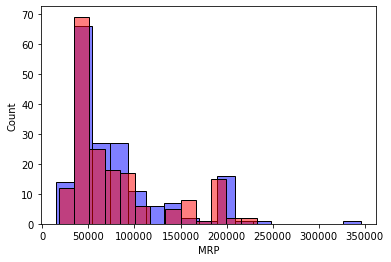

In [293]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [294]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  19751.296745372336


### Random Forest Regression

In [295]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train_ohe, y_train)

RandomForestRegressor()

In [296]:
y_test_pred = regressor_rf.predict(X_test_ohe)

In [297]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
198,39990.0,45822.199167
487,38705.0,38705.000000
365,118990.0,87149.430953
620,73490.0,74775.758174
636,38705.0,38705.000000


<AxesSubplot:xlabel='MRP', ylabel='Count'>

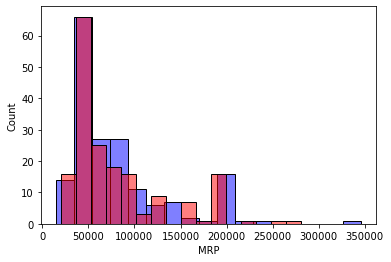

In [298]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [299]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  16017.42528713692


### Voting Regressor

In [300]:
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [301]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train_ohe, y_train)

In [302]:
y_test_pred = ereg.predict(X_test_ohe)

In [303]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
198,39990.0,47599.750849
487,38705.0,39964.405422
365,118990.0,92750.661154
620,73490.0,65387.708659
636,38705.0,39964.405422


<AxesSubplot:xlabel='MRP', ylabel='Count'>

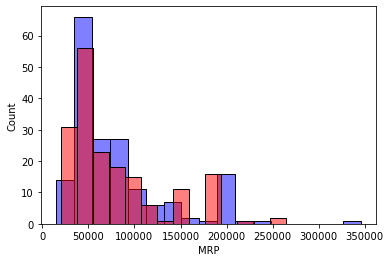

In [304]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [305]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  15252.432886501481


### Stacking Regressor

In [306]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [307]:
estimators = [
    ('lr', LinearRegression()),
    ("knn",KNeighborsRegressor(10)),
    ('rf',RandomForestRegressor(random_state=1))]

stack_regressor = StackingRegressor(estimators=estimators,
                                      final_estimator=LinearRegression())

stack_regressor.fit(X_train_ohe, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor(n_neighbors=10)),
                              ('rf', RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression())

In [308]:
predictions = stack_regressor.predict(X_test_ohe)

In [309]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
198,39990.0,46905.991811
487,38705.0,38842.831591
365,118990.0,89620.360893
620,73490.0,76615.373855
636,38705.0,38842.831591


<AxesSubplot:xlabel='MRP', ylabel='Count'>

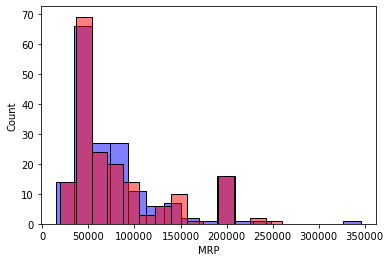

In [310]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [311]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  16372.30571134913


### AdaBoost Regressor

In [126]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [312]:
adaboost_Regressor = AdaBoostRegressor()

adaboost_Regressor.fit(X_train_ohe, y_train)

AdaBoostRegressor()

In [313]:
predictions = adaboost_Regressor.predict(X_test_ohe)

In [314]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
198,39990.0,51488.605263
487,38705.0,51488.605263
365,118990.0,127343.683636
620,73490.0,58068.218579
636,38705.0,51488.605263


<AxesSubplot:xlabel='MRP', ylabel='Count'>

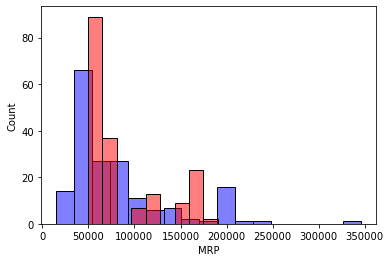

In [315]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [316]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  26274.558334744615


### GBDT Regressor

In [317]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbdt = GradientBoostingRegressor()

model_gbdt.fit(X_train_ohe, y_train)

GradientBoostingRegressor()

In [318]:
predictions = model_gbdt.predict(X_test_ohe)

In [319]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
198,39990.0,48725.574982
487,38705.0,42600.637971
365,118990.0,95323.397378
620,73490.0,61528.248543
636,38705.0,42600.637971


<AxesSubplot:xlabel='MRP', ylabel='Count'>

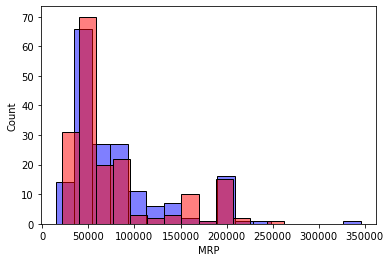

In [320]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [321]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  16027.440271182428


### XGBoost Regressor

In [322]:
import xgboost as xgb
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

model_xgb.fit(X_train_ohe, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [323]:
predictions = model_xgb.predict(X_test_ohe)

In [324]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
198,39990.0,46245.347656
487,38705.0,38619.406250
365,118990.0,87139.507812
620,73490.0,74545.875000
636,38705.0,38619.406250


<AxesSubplot:xlabel='MRP', ylabel='Count'>

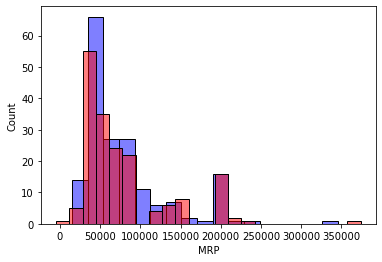

In [325]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [326]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  17344.82913629475


### Summary

In [327]:
dataframe = {'Algorithm' : ['Linear Regression','KNN','Decision Tree',
                            'Random Forest','Voting','Stacking','AdaBoost','GBDT','XGBoost'],
            'RMSE' : [16048.61,22155.48,19751.29,16017.42,15252.43,16372.30,26274.55,16027.44,17344.82]}

summary = pd.DataFrame(dataframe,index=[1,2,3,4,5,6,7,8,9])
s1=summary.sort_values(by=['RMSE']).set_index(np.arange(1,10))
s1

,Algorithm,RMSE
1,Voting,15252.43
2,Random Forest,16017.42
3,GBDT,16027.44
4,Linear Regression,16048.61
5,Stacking,16372.30
6,XGBoost,17344.82
7,Decision Tree,19751.29
8,KNN,22155.48
9,AdaBoost,26274.55


### Business Insights

- According to the analysis, companies like LENEVO, ASUS, HP, & DELL are ruling in the entire laptop market.
- Around 50% of laptop price varies between 20000 to 50000.
- If I talk about in premium segment like APPLE only 10% of laptop is above 150000.
- I came into conclusion that in most of the laptops are having Intel core i3 processor, 64 bit Windows 11 Operating System , 8 GB RAM and 515 SSD.
- APPLE, ASUS & DELL are having highest price among other companies.

## SPRINT 2

### Checking Overfitting & Underfitting

In [338]:
# Linear Regression -->

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

y_train_pred = lr.predict(X_train_ohe)

y_test_pred = lr.predict(X_test_ohe)

print('RMSE for train data: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for train data:  16598.067072105463
RMSE for test data:  16048.616125389495


In [339]:
# KNN -->

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_ohe, y_train)

y_train_pred = knn.predict(X_train_ohe)

y_test_pred = knn.predict(X_test_ohe)

print('RMSE for train data: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for train data:  20114.992775246585
RMSE for test data:  22155.48149566302


In [340]:
# Decision Tree -->

from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_ohe, y_train)

y_train_pred = regressor_dt.predict(X_train_ohe)

y_test_pred = regressor_dt.predict(X_test_ohe)

print('RMSE for train data: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for train data:  12360.870002320906
RMSE for test data:  18432.82930915443


In [341]:
# Random Forest -->

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train_ohe, y_train)

y_train_pred = regressor_rf.predict(X_train_ohe)

y_test_pred = regressor_rf.predict(X_test_ohe)

print('RMSE for train data: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for train data:  13879.852684442343
RMSE for test data:  16248.555240771235


**Observation -->** From the above analysis we came into conclusion that our model neither Underfitted nor Overfitted.

### Hyperparameter Tuning

#### K-fold Cross Validation - KNN

In [342]:
from sklearn.model_selection import GridSearchCV

In [343]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=10,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [345]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'n_neighbors': 2, 'p': 1}
KNeighborsRegressor(n_neighbors=2, p=1)

Score on Test Data:  0.8354637937764315


In [356]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2,p=1)
knn.fit(X_train_ohe, y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [357]:
y_test_pred = knn.predict(X_test_ohe)

print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  22433.529409247123


#### K-fold Cross Validation - Decision Tree

In [358]:
tuned_parameters = [{'max_depth': list(range(5, 15)), 'max_features': list(range(1,5))}]

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=10,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                          'max_features': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

In [359]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'max_depth': 14, 'max_features': 3}
DecisionTreeRegressor(max_depth=14, max_features=3)

Score on Test Data:  0.8823297737740423


In [360]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(max_depth=14,max_features=3)
regressor_dt.fit(X_train_ohe, y_train)

DecisionTreeRegressor(max_depth=14, max_features=3)

In [361]:
y_test_pred = regressor_dt.predict(X_test_ohe)

print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  22340.19071071463


#### K-fold Cross Validation - Random Forest

In [362]:
tuned_parameters = [{'max_depth': list(range(5, 15)), 'max_features': list(range(1,5))}]

clf = GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                          'max_features': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

In [363]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'max_depth': 14, 'max_features': 3}
RandomForestRegressor(max_depth=14, max_features=3)

Score on Test Data:  0.871839897094398


In [368]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(max_depth=14, max_features=3)
regressor_rf.fit(X_train_ohe, y_train)

RandomForestRegressor(max_depth=14, max_features=3)

In [369]:
y_test_pred = regressor_rf.predict(X_test_ohe)

print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  19546.97264120856


### Lasso Regression

#### K-fold Cross Validation - Lasso

In [370]:
from sklearn.linear_model import Lasso

In [371]:
params = {'alpha': list(range(1,len(dt)))}

clf = GridSearchCV(
    estimator=Lasso(), 
    param_grid=params, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 719 candidates, totalling 3595 fits


S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.682e+09, tolerance: 1.788e+08
  model = cd_fast.enet_coordinate_descent(
S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.926e+09, tolerance: 1.808e+08
  model = cd_fast.enet_coordinate_descent(
S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.654e+09, tolerance: 1.433e+08
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [372]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'alpha': 4}
Lasso(alpha=4)

Score on Test Data:  0.9160999363451938


In [374]:
lasso = Lasso(alpha=4)
lasso.fit(X_train_ohe, y_train)

Lasso(alpha=4)

In [375]:
y_test_pred = lasso.predict(X_test_ohe)

# finding score for our model
score = lasso.score(X_test_ohe, y_test)
print("Model score : ", score)

Model score :  0.9160999363451938


In [376]:
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  16019.465108610484


### Ridge Regression

#### K-fold Cross Validation - Ridge

In [172]:
from sklearn.linear_model import Ridge

In [377]:
params = {'alpha': list(range(1,1000))}

clf = GridSearchCV(
    estimator=Ridge(), 
    param_grid=params, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [378]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'alpha': 1}
Ridge(alpha=1)

Score on Test Data:  0.9089616245528276


In [379]:
rdg = Ridge(alpha=1)
rdg.fit(X_train_ohe, y_train)

Ridge(alpha=1)

In [380]:
# predicting the y_test
y_test_pred = rdg.predict(X_test_ohe)
  
# finding score for our model
score = rdg.score(X_test_ohe, y_test)
print("Model score : ", score)

Model score :  0.9089616245528276


In [381]:
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  16687.03263602445


### ElasticNet Regression

#### K-fold Cross Validation - ElasticNet

In [178]:
from sklearn.linear_model import ElasticNet

In [382]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

clf = GridSearchCV(
    estimator=ElasticNet(), 
    param_grid=params, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.843e+10, tolerance: 1.788e+08
  model = cd_fast.enet_coordinate_descent(
S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.028e+10, tolerance: 1.808e+08
  model = cd_fast.enet_coordinate_descent(
S:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.623e+10, tolerance: 1.433e+08
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [383]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_ohe, y_test))

Best parameters set found on train set
{'alpha': 0.001}
ElasticNet(alpha=0.001)

Score on Test Data:  0.9161517639090844


In [386]:
e_net = ElasticNet(alpha = 0.001)
e_net.fit(X_train_ohe, y_train)

ElasticNet(alpha=0.001)

In [387]:
y_test_pred = e_net.predict(X_test_ohe)

# finding score for our model
score = e_net.score(X_test_ohe, y_test)
print("Model score : ", score)

Model score :  0.9161517639090844


In [388]:
print('RMSE for test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE for test data:  16014.516494316536


### After Hyperparameter Tuning 

In [389]:
dataframe = {'Algorithm' : ['Lasso Regression','Ridge Regression','ElasticNet Regression','KNN','Decision Tree',
                            'Random Forest'],
            'RMSE' : [16019.46,16687.03,16014.51,22433.52,22340.19,19546.97]}

summary_ht = pd.DataFrame(dataframe,index=[1,2,3,4,5,6])
s2=summary_ht.sort_values(by=['RMSE']).set_index(np.arange(1,7))
s2

,Algorithm,RMSE
1,ElasticNet Regression,16014.51
2,Lasso Regression,16019.46
3,Ridge Regression,16687.03
4,Random Forest,19546.97
5,Decision Tree,22340.19
6,KNN,22433.52


## Conclusion

In [390]:
pd.concat([s1,s2],axis=1,keys=['Before_Tuning','After_Tuning'])

Before_Tuning                     After_Tuning          
           Algorithm      RMSE              Algorithm      RMSE
1             Voting  15252.43  ElasticNet Regression  16014.51
2      Random Forest  16017.42       Lasso Regression  16019.46
3               GBDT  16027.44       Ridge Regression  16687.03
4  Linear Regression  16048.61          Random Forest  19546.97
5           Stacking  16372.30          Decision Tree  22340.19
6            XGBoost  17344.82                    KNN  22433.52
7      Decision Tree  19751.29                    NaN       NaN
8                KNN  22155.48                    NaN       NaN
9           AdaBoost  26274.55                    NaN       NaN

It has been observed that **Voting Ensemble** is the suitable model for the product price prediction.